## Context and Content

Clinical measures for a comprehensive assessment of the posture of the rearfoot-shank joint complex.

The abstract of the paper I wrote:

Increased lower-limb internal rotation and low/high foot arch are postural characteristics associated to musculoskeletal conditions. One of the possible causes for these postural abnormalities is altered pronation posture of the rearfoot-shank joint complex (RSJC), involving the frontal and transverse planes. Therefore, valid and reliable clinical measures to characterize the pronation posture of the RSJC, considering both motion planes, are needed.

Objective: To investigate the intra and inter-examiner reliabilities and the validity of clinical measures characterizing RFJC pronation posture.

Design: Reliability and concurrent validity study.

Participants: Twenty-two able-bodied, asymptomatic subjects with 23.2 years-old (SD± 3.76 ).

Setting: Laboratory.

Interventions: Not applicable.

Main Outcome Measures: Clinical measures and three-dimensional (3D) motion-capture system obtained the following angles: (a) RSJC frontal-plane posture, (b) RSJC transverse-plane posture, (c) RSJC pronation posture magnitude, defined as the mean value between the frontal-plane and transverse-plane postures of the calcaneus relative to the shank. The clinical measurements were taken with the digital inclinometer and compass of a smartphone application.

Results: The clinical measures proposed to assess posture of pronation, eversion and rotation of the RSJC showed high intra and inter-examiner reliabilities, with Intraclass Correlation Coefficients (ICC) between 0.884 and 0.980 (p<0.05).
These three proposed clinical measures are highly similar to the measures obtained with the 3D motion-capture system, with ICCs between 0.854 and 0.918 (p<0.05). 

Conclusion: Three clinical measures proposed (i.e. pronation, eversion and rotation of the RSJC) proved to be valid and reliable. Therefore, they can be used for a comprehensive characterization of the RSJC pronation posture.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics
print('Setup complete!')

Setup complete!


## The Data

Summary of the data:

- VOLUNTÁRIO: The subject.

- Dia: Collect date.

- Altura do navicular (cm): The navicular measurement.

- Medida: Mult-index

- CN Inclinômetro: Calcaneus measurement in neutral position.

- Calcâneo Neutro: Calcaneus measurement in neutral position.

- PN Inclinômetro: Shank measurement in neutral position.

- Perna Neutro: Shank measurement in neutral position.

- Rotação (°): Amount of rotation in degrees.

- CR Inclinômetro: Calcaneus measurement in relaxed position.

- Calcâneo Relaxado: Calcaneus measurement in relaxed position.

- PR Inclinômetro: Shank measurement in relaxed position.

- Perna Relaxado: Shank measurement in relaxed position.

- Calcâneo - perna NEUTRO: Difference between calcaneaus and shank in neutral position.

- Calcâneo - perna RELAXADO: Difference between calcaneaus and shank in relaxed position.

- DIFERENÇA NEUTRO - RELAXADO: Difference neutral relaxed.

- ÍNDICE DE POSTURA: The posture index (target).

- ÍNDICE MÉDIO: The average values of the posture index.

- OBSERVAÇÃO VISUAL: Visual observation during the collect.

- MÉDIA DIF_SN_RX: The average measurement between neutral and relaxed subtalar joint.

In [2]:
# Loading the data
df = pd.read_excel('MEDIDA_DE_POSTURA_DE_PÉ_MEDIDA CLÍNICA.xlsx', sheet_name=1)
df_2 = pd.read_excel('MEDIDA_DE_POSTURA_DE_PÉ_MEDIDA CLÍNICA.xlsx', sheet_name=0)

In [3]:
# Using the concat func
mp = pd.concat([df, df_2])

In [4]:
# Checking the head and info
mp.head()

,VOLUNTÁRIO,Dia,Altura do navicular (cm),Medida,CN Inclinômetro,Calcâneo Neutro,PN Inclinômetro,Perna Neutro,Rotação (°),CR Inclinômetro,Calcâneo Relaxado,PR Inclinômetro,Perna Relaxado,Calcâneo - perna NEUTRO,Calcâneo - perna RELAXADO,DIFERENÇA NEUTRO - RELAXADO,ÍNDICE DE POSTURA,ÍNDICE MÉDIO,OBSERVAÇÃO VISUAL,MÉDIA DIF_SN_RX
0,AFS0398,1.0,4.7,1.0,90.2,0.2,91.3,1.3,17.0,96.3,6.3,84.0,-6.0,-1.1,12.3,13.4,15.20,14.333333,NaN,NaN
1,NaN,NaN,NaN,2.0,90.5,0.5,90.2,0.2,15.0,97.3,7.3,84.3,-5.7,0.3,13.0,12.7,13.85,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,91.0,1.0,91.9,1.9,15.0,96.3,6.3,84.3,-5.7,-0.9,12.0,12.9,13.95,NaN,NaN,NaN
3,NaN,2.0,4.5,1.0,90.4,0.4,89.4,-0.6,17.0,95.4,5.4,82.8,-7.2,1.0,12.6,11.6,14.30,13.650000,NaN,NaN
4,NaN,NaN,NaN,2.0,90.1,0.1,88.6,-1.4,15.0,95.5,5.5,82.3,-7.7,1.5,13.2,11.7,13.35,NaN,NaN,NaN


In [5]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 140
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VOLUNTÁRIO                   44 non-null     object 
 1   Dia                          88 non-null     float64
 2   Altura do navicular (cm)     88 non-null     float64
 3   Medida                       264 non-null    float64
 4   CN Inclinômetro              246 non-null    float64
 5   Calcâneo Neutro              264 non-null    float64
 6   PN Inclinômetro              246 non-null    float64
 7   Perna Neutro                 264 non-null    float64
 8   Rotação (°)                  264 non-null    float64
 9   CR Inclinômetro              246 non-null    float64
 10  Calcâneo Relaxado            264 non-null    float64
 11  PR Inclinômetro              246 non-null    float64
 12  Perna Relaxado               264 non-null    float64
 13  Calcâneo - perna NEU

## Cleaning the Data

In [6]:
# Cut out the unnecessary columns for the model
mp.drop(['MÉDIA DIF_SN_RX','ÍNDICE MÉDIO','Altura do navicular (cm)','VOLUNTÁRIO','OBSERVAÇÃO VISUAL', 'Dia', 'Medida'], 
        axis=1, inplace=True)

## Check Outliers

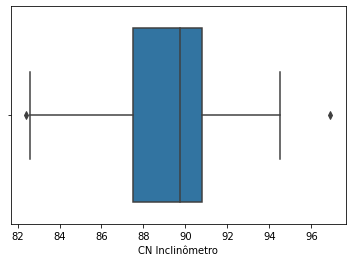

In [7]:
sns.boxplot(x='CN Inclinômetro',data=mp)

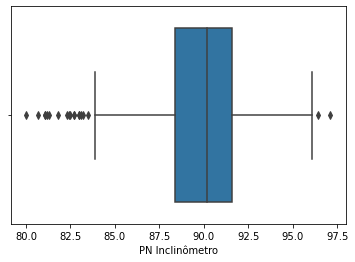

In [8]:
sns.boxplot(x='PN Inclinômetro',data=mp)

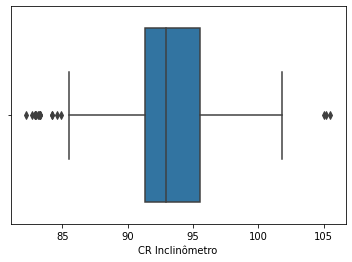

In [9]:
sns.boxplot(x='CR Inclinômetro',data=mp)

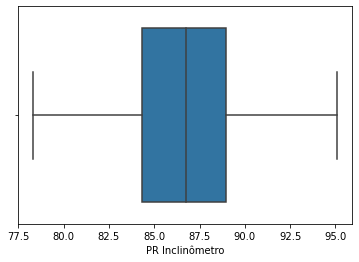

In [10]:
sns.boxplot(x='PR Inclinômetro',data=mp)

## Outlier Treatment

In [11]:
# Checking for outliers
Q1 = mp['PN Inclinômetro'].quantile(0.25)
Q3 = mp['PN Inclinômetro'].quantile(0.75)
IQR = Q3-Q1

In [12]:
# Calculating the lower and upper whiskers
lower = Q1-1.5*IQR
upper = Q3-1.5*IQR

In [14]:
df = mp[mp['PN Inclinômetro'] < upper]

In [15]:
# Removing the NaN values
mp.dropna(inplace=True)

In [16]:
# Checking the head and info again
mp.head()

,CN Inclinômetro,Calcâneo Neutro,PN Inclinômetro,Perna Neutro,Rotação (°),CR Inclinômetro,Calcâneo Relaxado,PR Inclinômetro,Perna Relaxado,Calcâneo - perna NEUTRO,Calcâneo - perna RELAXADO,DIFERENÇA NEUTRO - RELAXADO,ÍNDICE DE POSTURA
0,90.2,0.2,91.3,1.3,17.0,96.3,6.3,84.0,-6.0,-1.1,12.3,13.4,15.20
1,90.5,0.5,90.2,0.2,15.0,97.3,7.3,84.3,-5.7,0.3,13.0,12.7,13.85
2,91.0,1.0,91.9,1.9,15.0,96.3,6.3,84.3,-5.7,-0.9,12.0,12.9,13.95
3,90.4,0.4,89.4,-0.6,17.0,95.4,5.4,82.8,-7.2,1.0,12.6,11.6,14.30
4,90.1,0.1,88.6,-1.4,15.0,95.5,5.5,82.3,-7.7,1.5,13.2,11.7,13.35


In [17]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CN Inclinômetro              246 non-null    float64
 1   Calcâneo Neutro              246 non-null    float64
 2   PN Inclinômetro              246 non-null    float64
 3   Perna Neutro                 246 non-null    float64
 4   Rotação (°)                  246 non-null    float64
 5   CR Inclinômetro              246 non-null    float64
 6   Calcâneo Relaxado            246 non-null    float64
 7   PR Inclinômetro              246 non-null    float64
 8   Perna Relaxado               246 non-null    float64
 9   Calcâneo - perna NEUTRO      246 non-null    float64
 10  Calcâneo - perna RELAXADO    246 non-null    float64
 11  DIFERENÇA NEUTRO - RELAXADO  246 non-null    float64
 12  ÍNDICE DE POSTURA            246 non-null    float64
dtypes: float64(13)
memor

### Exploratory Data Analysis

In [18]:
# Let's see the describe
mp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CN Inclinômetro,246.0,89.200813,2.656651,82.40,87.500,89.75,90.8000,96.9
Calcâneo Neutro,246.0,-0.799187,2.656651,-7.60,-2.500,-0.25,0.8000,6.9
PN Inclinômetro,246.0,89.725203,3.252028,80.00,88.400,90.20,91.6000,97.1
Perna Neutro,246.0,-0.274797,3.252028,-10.00,-1.600,0.20,1.6000,7.1
Rotação (°),246.0,9.528455,4.491852,0.00,7.000,9.00,13.0000,20.0
CR Inclinômetro,246.0,93.013008,3.908378,82.20,91.300,92.90,95.5000,105.5
Calcâneo Relaxado,246.0,3.013008,3.908378,-7.80,1.300,2.90,5.5000,15.5
PR Inclinômetro,246.0,86.518780,3.165117,78.30,84.300,86.75,88.9750,95.1
Perna Relaxado,246.0,-3.481220,3.165117,-11.70,-5.700,-3.25,-1.0250,5.1
Calcâneo - perna NEUTRO,246.0,-0.524390,3.476225,-11.60,-2.400,0.00,1.5750,7.1


In [19]:
# By these two plots, we can see that a linear regression may be appropriate to solve our problem

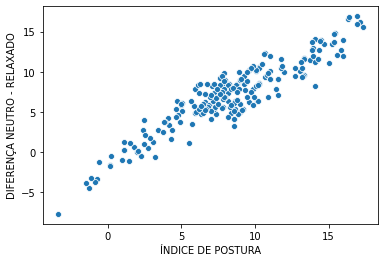

In [20]:
sns.scatterplot(x='ÍNDICE DE POSTURA',y='DIFERENÇA NEUTRO - RELAXADO',data=mp)

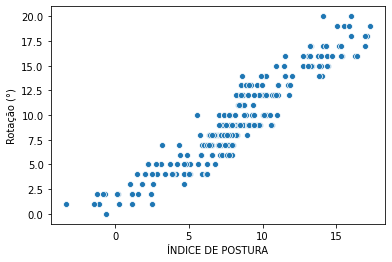

In [21]:
sns.scatterplot(x='ÍNDICE DE POSTURA',y='Rotação (°)',data=mp)

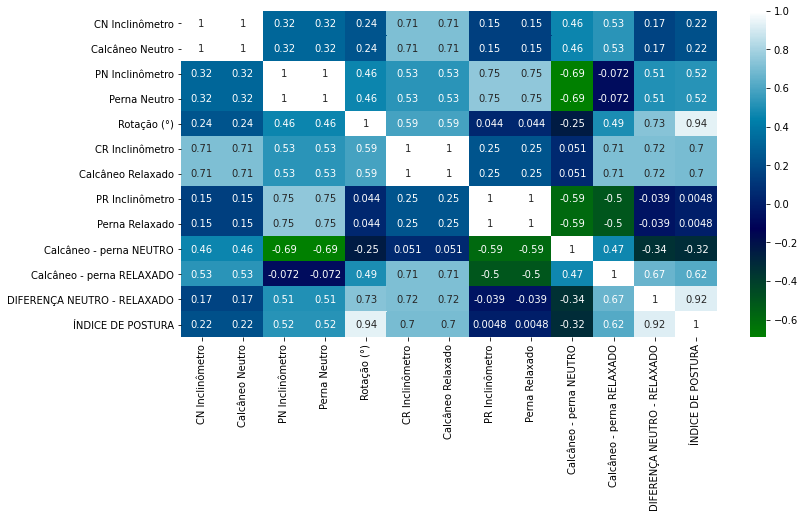

In [39]:
# Correlations
plt.figure(figsize=(12,6))
sns.heatmap(mp.corr(), annot=True, cmap='ocean')

## Train Test Split

In [23]:
# The variables that will be relevant for the model
X = mp[['Calcâneo Neutro', 'Perna Neutro', 'Rotação (°)', 'Calcâneo Relaxado',
       'Perna Relaxado','Calcâneo - perna NEUTRO','Calcâneo - perna RELAXADO', 'DIFERENÇA NEUTRO - RELAXADO']]
# The target
y = mp['ÍNDICE DE POSTURA']

In [24]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling using XG boost

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance, plot_tree
print('XG boost ready!')

XG boost ready!


### Creating and Training the Model

In [26]:
XG_model = xgb.XGBRegressor(n_estimators=1000)

In [27]:
XG_model.fit(X_train, y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=50,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Predictions from our Model

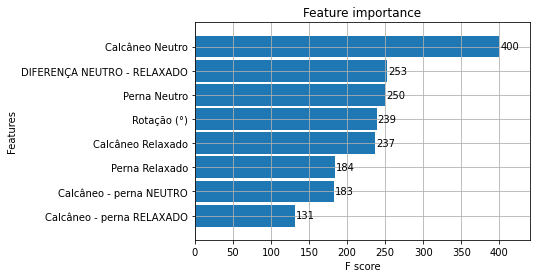

In [28]:
importance = plot_importance(XG_model, height=0.9)

In [29]:
XG_test_prediction = XG_model.predict(X_test)

Text(0, 0.5, 'predictions')

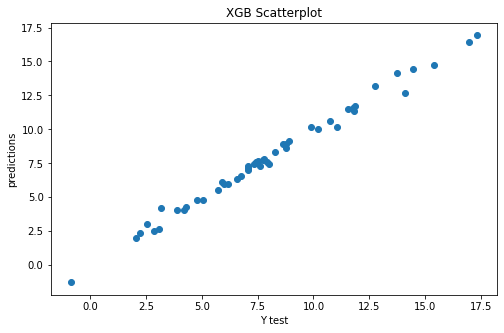

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(y_test,XG_test_prediction)
plt.title('XGB Scatterplot')
plt.xlabel('Y test')
plt.ylabel('predictions')

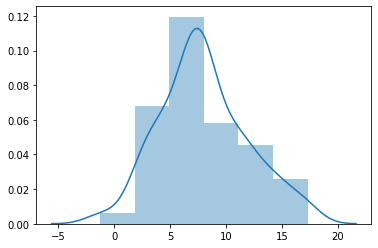

In [32]:
# Residual Histogram
sns.distplot((y_test,XG_test_prediction),bins=6)

### Regression Evaluation Metrics

In [33]:
MAE_XG = metrics.mean_absolute_error(y_test, XG_test_prediction)
MSE_XG = metrics.mean_squared_error(y_test, XG_test_prediction)
RMSE_XG = np.sqrt(metrics.mean_squared_error(y_test, XG_test_prediction))

In [34]:
print('MAE:', MAE_XG)
print('MSE:', MSE_XG)
print('RMSE:', RMSE_XG)

MAE: 0.2777311863899227
MSE: 0.14864682267313678
RMSE: 0.38554743245564066


In [36]:
# Our model was able to accurately predict the values of the posture index. 

### Saving the model

In [35]:
import joblib

In [40]:
filename = 'XG_boost.sav'

In [41]:
joblib.dump(XG_model, filename)

['XG_boost.sav']